## 1 

To begin with, we want to remove all the rows that have empty values. And then separate the independent variables which starting from column number 1 to the end. The rows are M and the columns are N. Then we make an MxN matrix.

Our goal is to find dimensions gives the most information or highest variance. This can be calculated by looking at the highest eigenvalues.

<li>First find the mean for each feature on the given data points

<li>And then find the diagonal Covariance matrix

<li>From the covariance matrix, we can find the eigenvalues and the eigenvectors

<li>Pair the largest eigenvalue with its vector and so on.

<li>Compute reduced representation where Lambda 1 has the largest eiqenvalue


## 2



## 3 Top two principle directions

C:\Users\jonathan.bong\AppData\Local\Continuum\anaconda37\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.


Largest Eigenvector vs Features


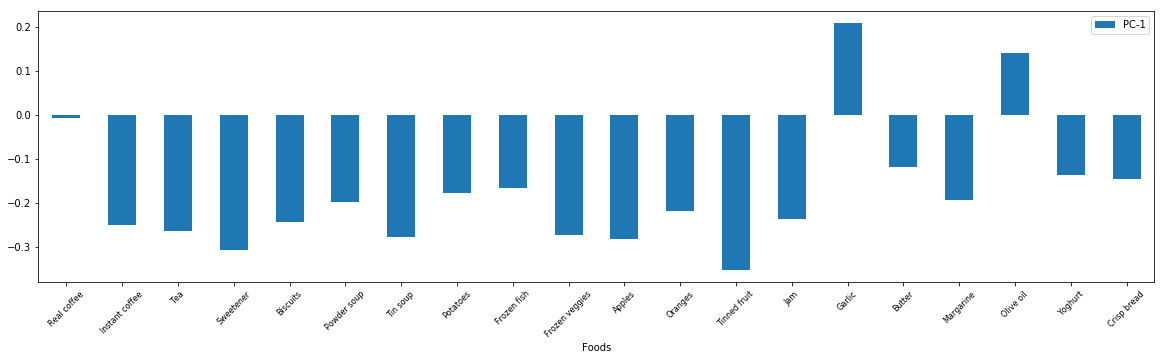

Second Largest Eigenvector vs Features


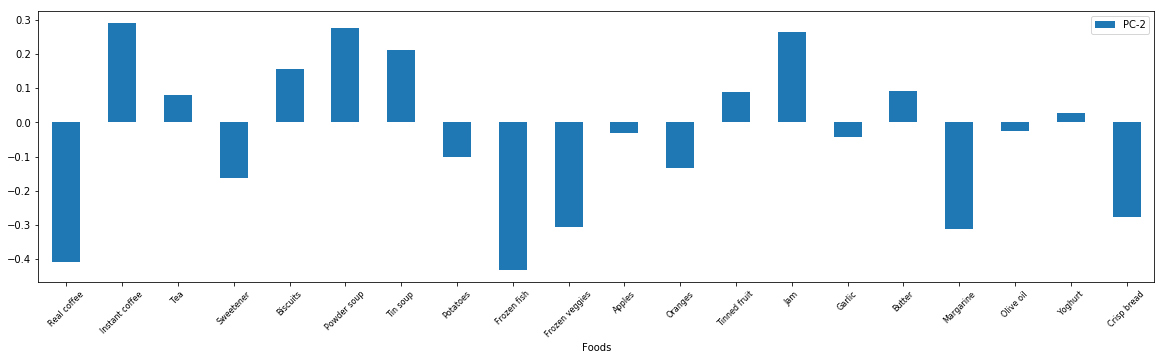

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt

sc = StandardScaler() 


# load data
df = pd.read_csv("data\\food-consumption.csv")
df = df.dropna(axis=0) # remove rows with blank values

df

# define independent variables
no_of_dim = df.shape[1]


x = df.iloc[:, 1:no_of_dim]
y = df.iloc[:, 0].values 

# normalize data

from sklearn import preprocessing
x_std = preprocessing.scale(x)
data_scaled = pd.DataFrame(x_std,columns = x.columns) 



# fit PCA to pick top 2 vectors 
pca = PCA(n_components = 2) 

x_pca = pca.fit_transform(x_std) 

# plot the vectors result
df_PCA = pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2'])
df_PCA= df_PCA.transpose()
df_PCA['Foods'] =df_PCA.index


# plot the PCA result
print("Largest Eigenvector vs Features")

ax = df_PCA.plot.bar(x='Foods', y='PC-1', rot=0,figsize = (20,5))
plt.xticks(fontsize=8, rotation=45)
plt.show()

print("Second Largest Eigenvector vs Features")

ax = df_PCA.plot.bar(x='Foods', y='PC-2', rot=0,figsize = (20,5))
plt.xticks(fontsize=8, rotation=45)
plt.show()


Observation:

PC-1 : There are 20 features. Real coffe has no impact on PC1 as it shows a score of 0. Garlic (largst positive eigenvector) and olive oil are the only features that show positive relationship. The rest of the features are giving inverse relationship between the factor and variables. In PC1, Garlic has the biggest positive eigenvector and Tinned fruit has the biggest negative eigenvector.

PC-2 : On the second PCA, Real coffee has the second largest negative relationship between the factor and variable. 8 features are giving positive eigenvectors. Garlichas minimal impact and Frozen fish has the highest in PC2



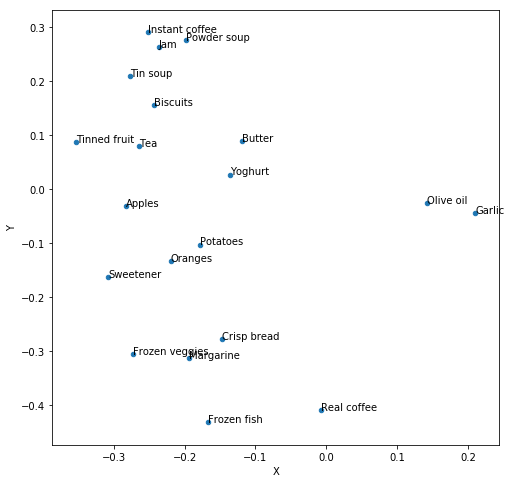

In [32]:

PCA_comp = pd.DataFrame(pca.components_.T)
PCA_comp = PCA_comp.rename ({0:"X",1:"Y"}, axis = 'columns')
features = pd.DataFrame(x.columns).T


combined = pd.concat([PCA_comp,features.T],axis=1)
combined = combined.rename ({0:"Foods"}, axis = 'columns')

fig, ax = plt.subplots()
combined.plot('X', 'Y', kind='scatter', ax=ax,figsize = (8,8))

for k, v in combined.iterrows():
       ax.annotate(v[2], [v[0],v[1]])


       PCA 1     PCA 2      Country
0  -1.485853 -0.844894      Germany
1   3.985418  0.486972        Italy
2   0.492387  0.784251       France
3  -2.809964  0.460268      Holland
4   0.868809 -0.068360      Belgium
5  -1.963630 -1.064758   Luxembourg
6  -4.091978  2.250740      England
7   4.787597 -0.705997     Portugal
8   3.263500 -0.191675      Austria
9  -0.752037  0.469361  Switzerland
10 -2.354756 -3.441081      Denmark
11 -0.137224 -2.317966       Norway
12  0.197731  4.183138      Ireland


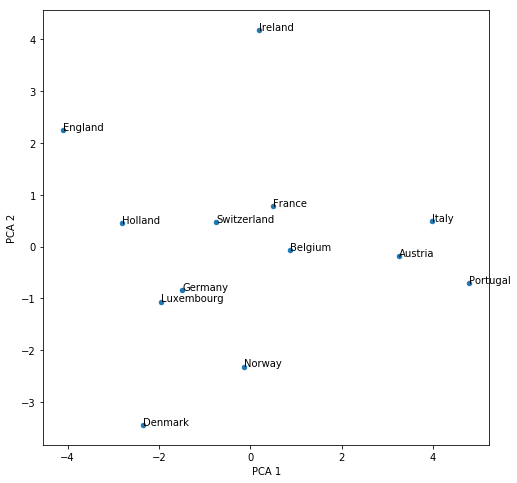

In [33]:
# PArt 4
PCAs = pd.DataFrame(x_pca)
PCAs = PCAs.rename ({0:"PCA 1",1:"PCA 2"}, axis = 'columns')

combined = pd.concat([PCAs,pd.DataFrame(y)],axis=1)
combined = combined.rename ({0:" Country"}, axis = 'columns')

print(combined)
fig, ax = plt.subplots()
combined.plot('PCA 1', 'PCA 2', kind='scatter', ax=ax,figsize = (8,8))

for k, v in combined.iterrows():
       ax.annotate(v[2], [v[0],v[1]])